<h2><center><font color="black"><strong>Test d'algorithme de KNN sur les coordonnées géographiques</strong></font></center></h2>

In [429]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [430]:
    # Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

    # Pipeline & Preprocess
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

    # Scores
from sklearn.metrics import balanced_accuracy_score, make_scorer, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , r2_score
from sklearn.metrics import mean_absolute_percentage_error

#### Import de la base

In [431]:
#df_Paris = pd.read_csv('../Data/update_data/df_Paris_Processed_Louise.csv', low_memory = False, encoding = 'latin1')
df_Paris_bis = pd.read_csv('../Data/update_data/df_Paris_Processed_Michel.csv', low_memory = False, encoding = 'latin1')

#df_Marseille = pd.read_csv('../Data/update_data/df_Marseille_Processed_1.csv', low_memory = False, encoding = 'latin1')
#df_Lyon = pd.read_csv('../Data/update_data/df_Lyon_Processed.csv', low_memory = False, encoding = 'latin1')
#df_Toulouse = pd.read_csv('../Data/update_data/df_Toulouse_Processed.csv', low_memory = False, encoding = 'latin1')

In [432]:
df = pd.concat([df_Paris_bis, df_Marseille, df_Lyon, df_Toulouse] , axis=0 , ignore_index=True)

**Run helpers**

In [433]:
%run '../Helpers/preprocessing.py'

In [434]:
%run '../Helpers/graph.py'

In [435]:
%run '../Helpers/score.py'

#### Visualisation de la base

In [436]:
df.head(4)

,Unnamed: 0,id_mutation,date_mutation,code_type_local,code_commune,surface_terrain,surface_reelle_bati,nombre_pieces_principales,nature_culture,valeur_fonciere,latitude,longitude,nombre_lots,numero_disposition,code_departement,Nombre_house,Nombre_dependance,geometry,iris_code,iris_name,Prix_m2,Year,Month,prix_m2_moy_surf_habit,prix_m2_moy_terrain,Vente_par_iris,num_trimestre,quarter,IPL,IPL_{Q-1},N_logements,N_res_ppale,N_res_second,N_vacant,N_maisons,N_apparts,N_proprietaire,N_locataire,Arrondissement,n_metros_iris,dist_metro,trimestre,prix_m2_moy_IRIS_trimestri_surf_habit,taux_accroissement,Vente_par_iris_tri,index_right,year,reg_code,reg_name,dep_code,dep_name,arrdep_code,bv2012_code,bv2012_name,epci_code,epci_name,com_code,com_name,com_arm_cod,com_arm_nam,iris_name_u,iris_name_l,iris_area_c,iris_type,iris_grd_qu,iris_in_ctu
0,0.0,2017-731653,2017-07-04,2.0,75103,0.0,42.0,3.0,0,571110.0,48.858043,2.366404,2,1,75,1,0,POINT (2.366404 48.858043),751031102,Les Archives,13597.857143,2017,7,10436.251897,0.0,212,3.0,2017_Q3,105.7,103.5,1229.0,962.0,193.0,74.0,0.0,1226.0,328.0,598.0,75103.0,1.0,[0.0016037123683117535],2017-07-01,11964.49675,0.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2017-731668,2017-07-07,2.0,75103,0.0,88.0,3.0,0,1414600.0,48.857626,2.364992,2,1,75,1,1,POINT (2.364992 48.857626),751031102,Les Archives,16075.000000,2017,7,10436.251897,0.0,212,3.0,2017_Q3,105.7,103.5,1229.0,962.0,193.0,74.0,0.0,1226.0,328.0,598.0,75103.0,1.0,[0.002943177844486507],2017-07-01,11964.49675,0.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,2017-731783,2017-07-19,2.0,75103,0.0,17.0,1.0,0,215000.0,48.856136,2.366991,1,1,75,1,0,POINT (2.366991 48.856136),751031102,Les Archives,12647.058824,2017,7,10436.251897,0.0,212,3.0,2017_Q3,105.7,103.5,1229.0,962.0,193.0,74.0,0.0,1226.0,328.0,598.0,75103.0,1.0,[0.0017116064606917485],2017-07-01,11964.49675,0.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,2017-731808,2017-07-27,2.0,75103,0.0,72.0,3.0,0,598000.0,48.857626,2.364992,1,1,75,1,0,POINT (2.364992 48.857626),751031102,Les Archives,8305.555556,2017,7,10436.251897,0.0,212,3.0,2017_Q3,105.7,103.5,1229.0,962.0,193.0,74.0,0.0,1226.0,328.0,598.0,75103.0,1.0,[0.002943177844486507],2017-07-01,11964.49675,0.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Définition des fonctions utiles (à déplacer dans les Helpers)

In [437]:
# Mettre en log les variables continues

In [438]:
# Normaliser les données

In [439]:
# Créer les variables Annee-Trimestre

In [440]:
# Pour le split temporel à actualiser (ie prendre t-1)

In [441]:
# Pour le modèle

In [442]:
# Pour utiliser les Knn

## Appliquer les fonctions aux données

In [443]:
df = df_Paris_bis

In [444]:
    # Créer la variable log
log_var(df, ['Prix_m2'])
log_var(df, ['valeur_fonciere'])
log_var(df, ['surface_reelle_bati'])

In [445]:
    # Ajouter la variable ANNEE-TRIMESTRE
annee_trimestre(df)

In [446]:
df.columns

Index(['Unnamed: 0', 'id_mutation', 'date_mutation', 'code_type_local',
       'code_commune', 'surface_terrain', 'surface_reelle_bati',
       'nombre_pieces_principales', 'nature_culture', 'valeur_fonciere',
       'latitude', 'longitude', 'nombre_lots', 'numero_disposition',
       'code_departement', 'Nombre_house', 'Nombre_dependance', 'geometry',
       'iris_code', 'iris_name', 'Prix_m2', 'Year', 'Month',
       'prix_m2_moy_surf_habit', 'prix_m2_moy_terrain', 'Vente_par_iris',
       'num_trimestre', 'quarter', 'IPL', 'IPL_{Q-1}', 'N_logements',
       'N_res_ppale', 'N_res_second', 'N_vacant', 'N_maisons', 'N_apparts',
       'N_proprietaire', 'N_locataire', 'Arrondissement', 'n_metros_iris',
       'dist_metro', 'trimestre', 'prix_m2_moy_IRIS_trimestri_surf_habit',
       'taux_accroissement', 'Vente_par_iris_tri', 'Prix_m2_log',
       'valeur_fonciere_log', 'surface_reelle_bati_log'],
      dtype='object')

In [370]:
df

,Unnamed: 0,id_mutation,date_mutation,code_type_local,code_commune,surface_terrain,surface_reelle_bati,nombre_pieces_principales,nature_culture,valeur_fonciere,latitude,longitude,nombre_lots,numero_disposition,code_departement,Nombre_house,Nombre_dependance,geometry,iris_code,iris_name,Prix_m2,Year,Month,prix_m2_moy_surf_habit,prix_m2_moy_terrain,Vente_par_iris,num_trimestre,quarter,IPL,IPL_{Q-1},N_logements,N_res_ppale,N_res_second,N_vacant,N_maisons,N_apparts,N_proprietaire,N_locataire,Arrondissement,n_metros_iris,dist_metro,trimestre,prix_m2_moy_IRIS_trimestri_surf_habit,taux_accroissement,Vente_par_iris_tri,Prix_m2_log,valeur_fonciere_log,surface_reelle_bati_log
0,0,2017-731653,2017-07-04,2.0,75103,0.0,42.0,3.0,0,571110.0,48.858043,2.366404,2,1,75,1,0,POINT (2.366404 48.858043),751031102,Les Archives,13597.857143,2017,7,10436.251897,0.0,212,3,2017_Q3,105.7,103.5,1229.0,962.0,193.0,74.0,0.0,1226.0,328.0,598.0,75103,1,0.001604,2017-07-01,11964.496750,0.000000,12,9.517667,13.255337,3.737670
1,1,2017-731668,2017-07-07,2.0,75103,0.0,88.0,3.0,0,1414600.0,48.857626,2.364992,2,1,75,1,1,POINT (2.364992 48.857626),751031102,Les Archives,16075.000000,2017,7,10436.251897,0.0,212,3,2017_Q3,105.7,103.5,1229.0,962.0,193.0,74.0,0.0,1226.0,328.0,598.0,75103,1,0.002943,2017-07-01,11964.496750,0.000000,12,9.685021,14.162357,4.477337
2,2,2017-731783,2017-07-19,2.0,75103,0.0,17.0,1.0,0,215000.0,48.856136,2.366991,1,1,75,1,0,POINT (2.366991 48.856136),751031102,Les Archives,12647.058824,2017,7,10436.251897,0.0,212,3,2017_Q3,105.7,103.5,1229.0,962.0,193.0,74.0,0.0,1226.0,328.0,598.0,75103,1,0.001712,2017-07-01,11964.496750,0.000000,12,9.445180,12.278393,2.833213
3,3,2017-731808,2017-07-27,2.0,75103,0.0,72.0,3.0,0,598000.0,48.857626,2.364992,1,1,75,1,0,POINT (2.364992 48.857626),751031102,Les Archives,8305.555556,2017,7,10436.251897,0.0,212,3,2017_Q3,105.7,103.5,1229.0,962.0,193.0,74.0,0.0,1226.0,328.0,598.0,75103,1,0.002943,2017-07-01,11964.496750,0.000000,12,9.024680,13.301346,4.276666
4,4,2017-731873,2017-07-28,2.0,75103,0.0,32.0,2.0,0,360000.0,48.856914,2.367498,2,1,75,1,0,POINT (2.367498 48.856914),751031102,Les Archives,11250.000000,2017,7,10436.251897,0.0,212,3,2017_Q3,105.7,103.5,1229.0,962.0,193.0,74.0,0.0,1226.0,328.0,598.0,75103,1,0.000783,2017-07-01,11964.496750,0.000000,12,9.328123,12.793859,3.465736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144377,144342,2022-520591,2022-04-29,2.0,75102,0.0,57.0,2.0,0,1150000.0,48.868561,2.331089,1,1,75,1,0,POINT (2.331089 48.868561),751020502,Gaillon,20175.438596,2022,4,16657.860941,0.0,49,2,2022_Q2,130.8,128.6,241.0,146.0,74.0,21.0,0.0,232.0,20.0,110.0,75102,0,0.004724,2022-04-01,14862.135922,0.233335,6,9.912221,13.955273,4.043051
144378,144343,2022-523201,2022-06-08,2.0,75102,0.0,85.0,3.0,0,1260000.0,48.868660,2.331416,4,1,75,1,1,POINT (2.331416 48.86866),751020502,Gaillon,14823.529412,2022,6,16657.860941,0.0,49,2,2022_Q2,130.8,128.6,241.0,146.0,74.0,21.0,0.0,232.0,20.0,110.0,75102,0,0.004385,2022-04-01,14862.135922,0.233335,6,9.603971,14.046622,4.442651
144379,144344,2022-524612,2022-06-28,2.0,75102,0.0,28.0,1.0,0,385000.0,48.869712,2.330600,1,1,75,1,0,POINT (2.3306 48.869712),751020502,Gaillon,13750.000000,2022,6,16657.860941,0.0,49,2,2022_Q2,130.8,128.6,241.0,146.0,74.0,21.0,0.0,232.0,20.0,110.0,75102,0,0.005154,2022-04-01,14862.135922,0.233335,6,9.528794,12.860999,3.332205
144380,144345,2022-524614,2022-06-23,2.0,75102,0.0,76.0,2.0,0,1350000.0,48.868660,2.331416,2,1,75,1,0,POINT (2.331416 48.86866),751020502,Gaillon,17763.157895,2022,6,16657.860941,0.0,49,2,2022_Q2,130.8,128.6,241.0,146.0,74.0,21.0,0.0,232.0,20.0,110.0,75102,0,0.004385,2022-04-01,14862.135922,0.233335,6,9.784882,14.115615,4.330733


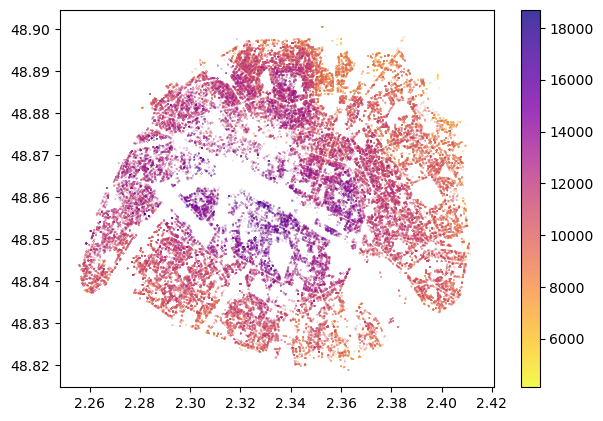

In [371]:
max_prix = np.quantile(df_Paris_bis.Prix_m2, 0.99)
min_prix = np.quantile(df_Paris_bis.Prix_m2, 0.01)

df_to_visualise = df_Paris_bis[(df_Paris_bis.Prix_m2 < max_prix)
                        & (df_Paris_bis.Prix_m2 > min_prix)
                        & (df_Paris_bis.code_type_local == 2)]
    
df_sorted = df_to_visualise.sort_values(by='Prix_m2')
x = df_sorted['longitude']
y = df_sorted['latitude']
c = df_sorted['Prix_m2'] 

plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams['figure.dpi'] = 100 

plt.scatter(x, y, s=0.01, c=c, cmap='plasma_r', alpha=0.8)
plt.colorbar()
plt.show()

In [469]:
#visualise(df, 200, 1000, 'Paris', 2, 0.99, 0.1)

In [470]:
#visualise(df, 200, 1000, 'Marseille - Aix-en-Provence', 2, 0.99, 0)

In [471]:
#visualise(df, 200, 1000, 'Lyon', 2, 1, 0)

## <center> Statistiques Descriptives

In [284]:
df.groupby(['bv2012_name', 'code_type_local']).agg({'id_mutation' : 'count'}).reset_index()

KeyError: 'bv2012_name'

## <center> K plus proches voisins sur la latitude/longitude

#### Pour PARIS

In [447]:
df.dtypes

Unnamed: 0                                        int64
id_mutation                                      object
date_mutation                            datetime64[ns]
code_type_local                                 float64
code_commune                                      int64
surface_terrain                                 float64
surface_reelle_bati                             float64
nombre_pieces_principales                       float64
nature_culture                                   object
valeur_fonciere                                 float64
latitude                                        float64
longitude                                       float64
nombre_lots                                       int64
numero_disposition                                int64
code_departement                                  int64
Nombre_house                                      int64
Nombre_dependance                                 int64
geometry                                        

In [448]:
df["dist_metro"] = df['dist_metro'].str[1:-1]
df['dist_metro'] = df[["dist_metro"]].apply(lambda x : x.str.split(","))

In [449]:
df[['dist_metro']]

,dist_metro
0,[0.0016037123683117535]
1,[0.002943177844486507]
2,[0.0017116064606917485]
3,[0.002943177844486507]
4,[0.0007830280660829769]
...,...
144377,"[0.010146443821698676, 0.0047237760214177416,..."
144378,"[0.009817648440685185, 0.004384820989564316, ..."
144379,"[0.010671922452908171, 0.0051536411973018195,..."
144380,"[0.009817648440685185, 0.004384820989564316, ..."


In [338]:
list_metros = df["dist_metro"].to_list()

In [339]:
list_min = []
for i in range(len(list_metros)) :
    dist = []
    for j in range(len(list_metros[i])):
        distance = list_metros[i][j]
        distance = float(distance)
        dist.append(distance)
    list_min.append(np.min(dist))

In [450]:
df['dist_metro'] = list_min

Les features sont : 
- pour le KNN : 
    - latitude; longitude
- pour le Random Forest ou GBoost:
    - y prédit du KNN
    - nombre de pièces principales
    - nombre de dépendances
    - IPL à Q 
    - IPL à Q-1
    - Nombre de logements occupés par le popriétaire dans l'iris
    - Nombre de logements occupés par un popriétaire dans l'iris
    - Nombre de logements vacants dans l'iris
    - Nombre d'appartements dans l'iris
    - Nombre de stations de métro dans l'iris
    - Distance à la station de métro la plus proche
    - Taux d'accroissement trimestriel du prix moyen dans l'iris

In [451]:
# Définition du dataset
# Sélectionner Paris sur les appartements (2) + sélection sur les quantiles
df_model = filtre_data_pour_model(df, 'Paris', 2, 0.1, 0.99)

    # Définition des var explicatives
features_knn = ['latitude', 'longitude']
features_RF = ['nombre_pieces_principales', 'Nombre_dependance', 'Vente_par_iris_tri',
               'IPL', 'IPL_{Q-1}', 'N_proprietaire', 'N_vacant', 'N_apparts',
               'n_metros_iris', 'dist_metro', 'taux_accroissement']
    # Def de l'output
label = 'Prix_m2'

In [452]:
df_model.columns

Index(['Unnamed: 0', 'id_mutation', 'date_mutation', 'code_type_local',
       'code_commune', 'surface_terrain', 'surface_reelle_bati',
       'nombre_pieces_principales', 'nature_culture', 'valeur_fonciere',
       'latitude', 'longitude', 'nombre_lots', 'numero_disposition',
       'code_departement', 'Nombre_house', 'Nombre_dependance', 'geometry',
       'iris_code', 'iris_name', 'Prix_m2', 'Year', 'Month',
       'prix_m2_moy_surf_habit', 'prix_m2_moy_terrain', 'Vente_par_iris',
       'num_trimestre', 'quarter', 'IPL', 'IPL_{Q-1}', 'N_logements',
       'N_res_ppale', 'N_res_second', 'N_vacant', 'N_maisons', 'N_apparts',
       'N_proprietaire', 'N_locataire', 'Arrondissement', 'n_metros_iris',
       'dist_metro', 'trimestre', 'prix_m2_moy_IRIS_trimestri_surf_habit',
       'taux_accroissement', 'Vente_par_iris_tri', 'Prix_m2_log',
       'valeur_fonciere_log', 'surface_reelle_bati_log'],
      dtype='object')

In [453]:
# Split des données en TRAIN et TEST
X_train, X_test, y_train, y_test = split_temporel_V1(df_model, features_RF+features_knn, label)

In [454]:
X_train_knn = X_train[features_knn]
X_test_knn = X_test[features_knn]

La tableau nous indique de prendre 19 voisins.

In [455]:
pipe = Pipeline([('scaler', MinMaxScaler()), ('Knn', KNeighborsRegressor(weights='distance'))])
parameters = {'Knn__n_neighbors': range(1,21,2)} # defining parameter space
knn_pipe = GridSearchCV(pipe, parameters, cv=5)
knn_pipe.fit(X_train_knn, y_train)

print('Returned hyperparameter: {}'.format(knn_pipe.best_params_))
print('Best classification accuracy in train is: {}'.format(knn_pipe.best_score_))
print('Classification accuracy on test is: {}'.format(knn_pipe.score(X_test_knn, y_test)))

Returned hyperparameter: {'Knn__n_neighbors': 19}
Best classification accuracy in train is: 0.07280222778216668
Classification accuracy on test is: 0.18243667430356703


In [456]:
def MAPE(Y_actual, Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

def MDAPE(Y_actual, Y_Predicted):
    mdape = np.median(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mdape

def compute_scores(model, X_test, y_test) :
    y_pred = model.predict(X_test)

    mape = MAPE(y_test, y_pred)
    mdape = MDAPE(y_test, y_pred)
    
    print("MAPE: ", mape)
    print("MDAPE: ", mdape)

In [457]:
compute_scores(knn_pipe, X_test[['latitude', 'longitude']], y_test)

MAPE:  12.495897681055776
MDAPE:  10.565439079887662


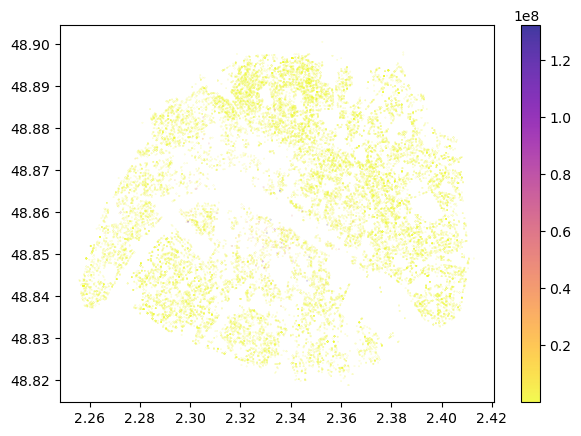

In [458]:
y_pred = knn_pipe.predict(X_test_knn)

x = X_test['longitude']
y = X_test['latitude']
c = np.exp(y_pred/1000)

plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams['figure.dpi'] = 100 

plt.scatter(x, y, s=0.01, c=c, cmap='plasma_r', alpha=0.8)
plt.colorbar()
plt.show()

In [459]:
y_pred

array([ 9000.09068739,  8584.34370224, 12010.317905  , ...,
        8911.63524651,  8039.21568627, 13243.88096901])

In [460]:
X_train

,nombre_pieces_principales,Nombre_dependance,Vente_par_iris_tri,IPL,IPL_{Q-1},N_proprietaire,N_vacant,N_apparts,n_metros_iris,dist_metro,taux_accroissement,latitude,longitude
95474,2.0,0,11,105.7,103.5,624.0,145.0,1530.0,0,0.003024,0.000000,48.887361,2.320216
74630,3.0,0,27,105.7,103.5,565.0,142.0,1575.0,0,0.002178,0.000000,48.847004,2.288406
84796,3.0,0,11,105.7,103.5,495.0,141.0,1576.0,0,0.002376,0.000000,48.864566,2.291426
84819,2.0,0,9,105.7,103.5,460.0,100.0,1425.0,0,0.003627,0.000000,48.870742,2.288733
84827,5.0,0,16,105.7,103.5,596.0,179.0,1989.0,1,0.002280,0.000000,48.864753,2.290634
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19617,1.0,0,8,126.2,122.5,376.0,126.0,1510.0,1,0.001287,0.067433,48.852261,2.344820
126518,2.0,1,5,126.2,122.5,564.0,113.0,1494.0,0,0.007737,0.076445,48.871767,2.391756
87656,6.0,1,11,126.2,122.5,439.0,48.0,1159.0,0,0.003701,0.015730,48.863282,2.274017
138059,17.0,0,8,126.2,122.5,791.0,117.0,1681.0,0,0.000389,-0.033945,48.852512,2.405872


In [461]:
X_train_rf = X_train[features_RF]
X_train_rf['y_pred_knn'] = knn_pipe.predict(X_train_knn)
X_test_rf = X_test[features_RF]
X_test_rf['y_pred_knn'] = knn_pipe.predict(X_test_knn)

/var/folders/yz/j7zl8ck90j528mms2yj13vhc0000gn/T/ipykernel_84337/2968021453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_rf['y_pred_knn'] = knn_pipe.predict(X_train_knn)
/var/folders/yz/j7zl8ck90j528mms2yj13vhc0000gn/T/ipykernel_84337/2968021453.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_rf['y_pred_knn'] = knn_pipe.predict(X_test_knn)


In [462]:
pipe = Pipeline([('scaler', StandardScaler()), ('RForest', RandomForestRegressor())])
parameters = {'RForest__max_depth': [5, 10]} # defining parameter space
rforest_pipe = GridSearchCV(pipe, parameters, cv=5)
rforest_pipe.fit(X_train_rf, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('RForest', RandomForestRegressor())]),
             param_grid={'RForest__max_depth': [5, 10]})

In [463]:
rforest_pipe.best_params_

{'RForest__max_depth': 10}

In [464]:
compute_scores(rforest_pipe, X_test_rf, y_test)

MAPE:  12.2287130037538
MDAPE:  9.831701499669943


In [465]:
pipe = Pipeline([('scaler', StandardScaler()), ('GBoost', GradientBoostingRegressor())])
parameters = {'GBoost__n_estimators': [50, 100, 150]} # defining parameter space
gboost_pipe = GridSearchCV(pipe, parameters, cv=5)
gboost_pipe.fit(X_train_rf, y_train)

compute_scores(gboost_pipe, X_test_rf, y_test)

MAPE:  12.181537445529631
MDAPE:  9.782155692319854


In [466]:
gboost_pipe.best_params_

{'GBoost__n_estimators': 150}

**Features importance**

RANDOM FOREST

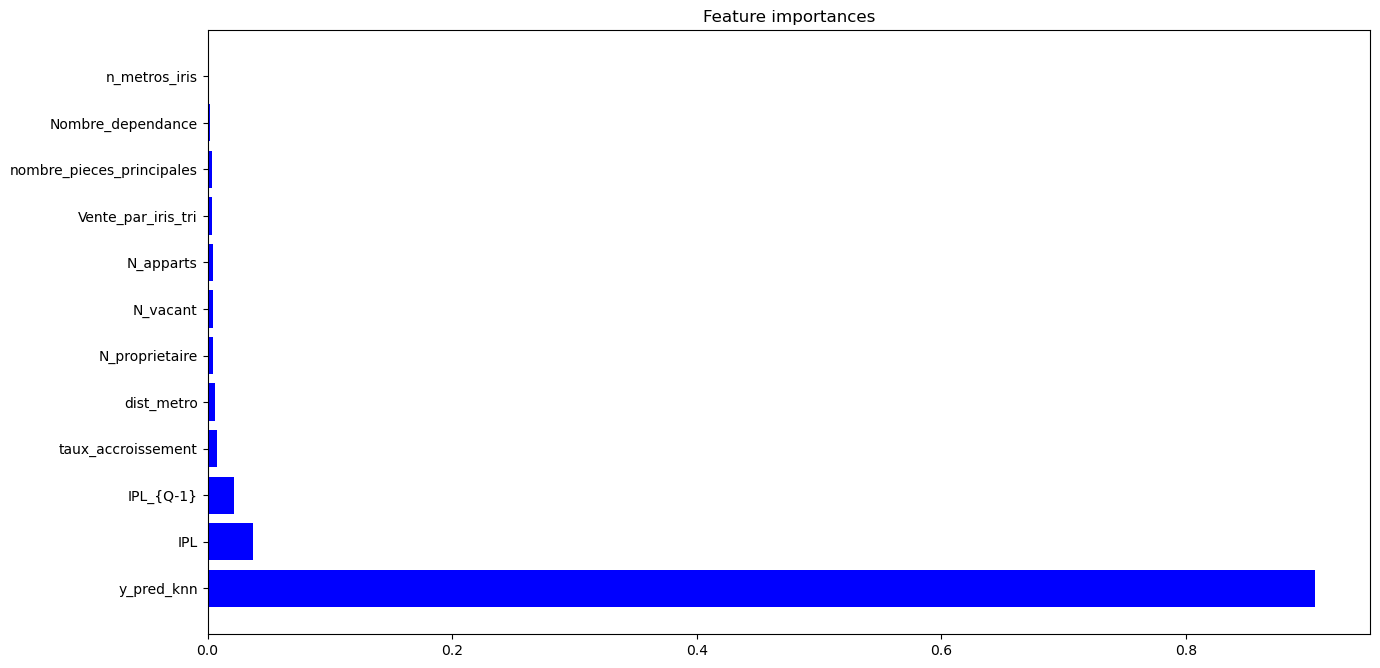

In [468]:
model_rf = RandomForestRegressor(max_depth=10)
model_rf.fit(X_train_rf, y_train)

#Prediciton 
y_pred_rf = model_rf.predict(X_test_rf)

importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]
columns = X_train_rf.columns
# plot
nb_features = X_train_rf.shape[1]
plt.figure(figsize=(15, 8))
plt.title("Feature importances")
plt.barh(
    range(nb_features),
    importances[indices],
    color='b')
plt.yticks(range(nb_features), columns[indices], rotation='horizontal', size=10)
plt.show()

XG BOOST

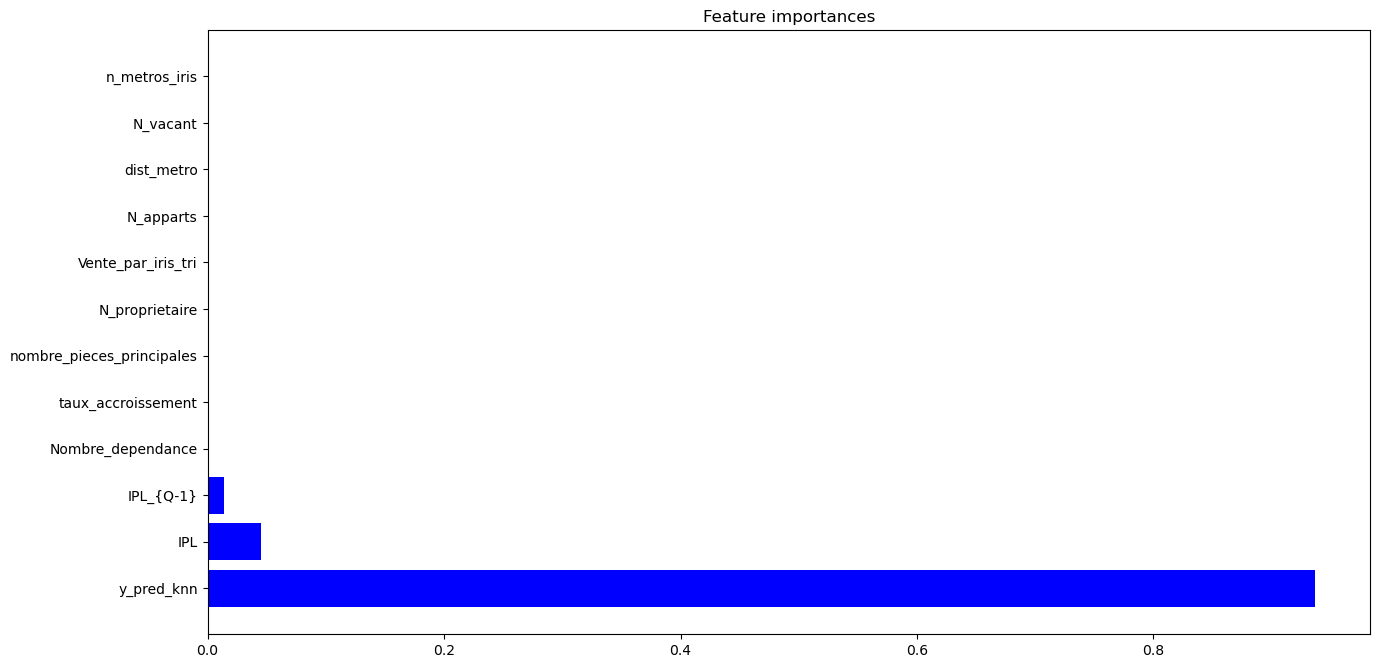

In [472]:
model_gb = GradientBoostingRegressor(n_estimators = 100)
model_gb.fit(X_train_rf, y_train)

#Prediciton 
y_pred_rf = model_gb.predict(X_test_rf)

importances = model_gb.feature_importances_
indices = np.argsort(importances)[::-1]
columns = X_train_rf.columns
# plot
nb_features = X_train_rf.shape[1]
plt.figure(figsize=(15, 8))
plt.title("Feature importances")
plt.barh(
    range(nb_features),
    importances[indices],
    color='b')
plt.yticks(range(nb_features), columns[indices], rotation='horizontal', size=10)
plt.show()

#### Pour les autres villes : 

In [78]:
def run_model_knn(data, ville, type_local, q_low, q_high,
                  features, label,
                 scaler, model, nb_voisins, nb_cv, graph_on_test = False) : 
    
    df_model = filtre_data_pour_model(data, ville, type_local, q_low, q_high)
    
    features = features
    label = label
    
    X_train, X_test, y_train, y_test = split_temporel_V1(df_model, features, label)
    
    pipe = Pipeline([('scaler', scaler), ('Knn', model(weights='distance'))])
    parameters = {'Knn__n_neighbors': nb_voisins} # defining parameter space
    knn_pipe = GridSearchCV(pipe, parameters, cv=nb_cv)
    knn_pipe.fit(X_train, y_train)
    
    # Afficher les scores
    print('Returned hyperparameter: {}'.format(knn_pipe.best_params_))
    print('Best classification accuracy in train is: {}'.format(knn_pipe.best_score_))
    print('Classification accuracy on test is: {}'.format(knn_pipe.score(X_test, y_test)))

    compute_scores(knn_pipe, X_test, y_test)
    
    if graph_on_test : 
        y_pred = knn_pipe.predict(X_test)

        x = X_test['longitude']
        y = X_test['latitude']
        c = np.exp(y_pred)

        plt.rcParams['figure.figsize'] = [7, 5]
        plt.rcParams['figure.dpi'] = 100 

        plt.scatter(x, y, s=0.01, c=c, cmap='plasma_r', alpha=0.8)
        plt.colorbar()
        plt.show()

Returned hyperparameter: {'Knn__n_neighbors': 19}
Best classification accuracy in train is: 0.2115394662595234
Classification accuracy on test is: -0.11585218164222666
MAPE:  23.11032074814159
MDAPE:  18.028305950236035


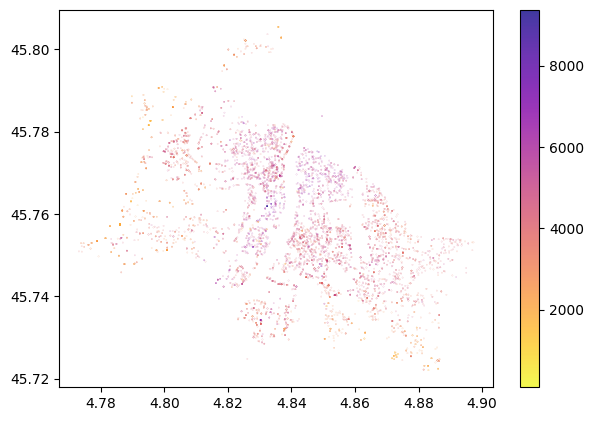

In [79]:
run_model_knn(df, 'Lyon', 2, 0, 1,
              ['latitude', 'longitude'], 'Prix_m2_log',
                 StandardScaler(), KNeighborsRegressor, range(1,21,2), 5, True)

Returned hyperparameter: {'Knn__n_neighbors': 19}
Best classification accuracy in train is: 0.6330709688258637
Classification accuracy on test is: 0.582998721206784
MAPE:  20.224616680597578
MDAPE:  16.773739972432605


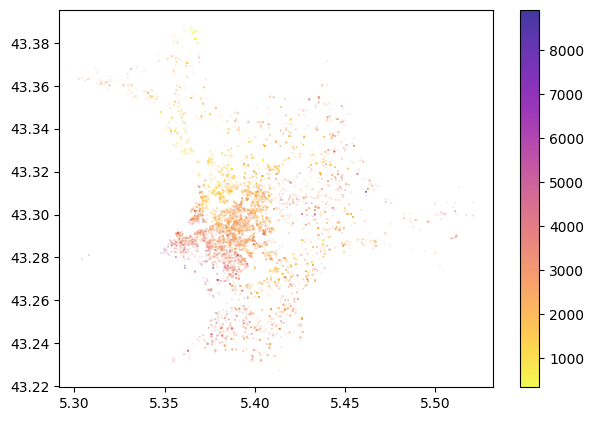

In [80]:
run_model_knn(df, 'Marseille - Aix-en-Provence', 2, 0, 1,
              ['latitude', 'longitude'], 'Prix_m2_log',
                 StandardScaler(), KNeighborsRegressor, range(1,21,2), 5, True)
mape = MAPE(np.exp(y_test), np.exp(y_pred))
mdape = MDAPE(np.exp(y_test), np.exp(y_pred))
    
print("MAPE: ", mape)
print("MDAPE: ", mdape)

In [2]:
def run_model_knn_maison(data, ville, type_local, q_low, q_high,
                  features1, features2, label,
                 scaler, model, nb_voisins, nb_cv, graph_on_test = False) : 
    
    df_model = filtre_data_pour_model(data, ville, type_local, q_low, q_high)
    
    features = features1 + features2
    label = label
    
    X_train, X_test, y_train, y_test = split_temporel_V1(df_model, features, label)
    
        # --------------------  Etape 1 : Modèle KNN ---------------------------------
    # Créer les bases pour le modèle KNN (avec les features1)
    X_train_knn = X_train[features1]
    X_test_knn = X_test[features1]
    
    # Entraîner le modèle
    pipe = Pipeline([('scaler', scaler), ('Knn', model(weights='distance'))])
    parameters = {'Knn__n_neighbors': nb_voisins} # defining parameter space
    knn_pipe = GridSearchCV(pipe, parameters, cv=nb_cv)
    knn_pipe.fit(X_train_knn, y_train)
    
    # Prédictions sur l'éch de test et de train
    y_pred_test_knn = knn_pipe.predict(X_test_knn)
    y_pred_train_knn = knn_pipe.predict(X_train_knn)

    # Calcul des scores de la première étape
    mape_knn = MAPE(np.exp(y_test), np.exp(y_pred_test_knn))
    mdape_knn = MDAPE(np.exp(y_test), np.exp(y_pred_test_knn))
    
    print("MAPE (Etape 1 : Knn): ", mape_knn)
    print("MDAPE (Etape 1 : Knn): ", mdape_knn)
    
        # --------------------  Etape 2 : Modèle RandomForest ---------------------------------
    # Créer les bases pour le second modèle (avec les features2)
    X_train_rf = X_train[features2]
    X_test_rf = X_test[features2]
    
    # Ajouter les prédictions du modèle KNN
    X_train_rf['y_pred_knn'] = knn_pipe.predict(X_train_knn)
    X_test_rf['y_pred_knn'] = knn_pipe.predict(X_test_knn)
    
    # Entraînement du modèle
    pipe2 = Pipeline([('scaler', StandardScaler()), ('RForest', RandomForestRegressor())])
    parameters = {'RForest__max_depth': [3, 4, 5, 6, 7, 8, 9]} # defining parameter space
    rforest_pipe = GridSearchCV(pipe2, parameters, cv=5)
    rforest_pipe.fit(X_train_rf, y_train)
    
    print("Scores de la seconde étape : ")
    print('Returned hyperparameter: {}'.format(rforest_pipe.best_params_))
    print('Best classification accuracy in train is: {}'.format(rforest_pipe.best_score_))
    print('Classification accuracy on test is: {}'.format(rforest_pipe.score(X_test_rf, y_test)))

    #Predition 
    y_pred_rf = rforest_pipe.predict(X_test_rf)
    
    # Calcul des scores de la seconde étape
    
    print("MAPE (Etape 2 : RForest): ", MAPE(np.exp(y_test), np.exp(y_pred_rf)))
    print("MDAPE (Etape 2 : RForest): ", MDAPE(np.exp(y_test), np.exp(y_pred_rf)))

In [3]:
run_model_knn_maison(df, 'Marseille - Aix-en-Provence', 1, 0, 1,
                     ['latitude', 'longitude'],
                     ['surface_reelle_bati_log', 'nombre_pieces_principales', 'nombre_lots'],
                     'valeur_fonciere_log',
                 MinMaxScaler(), KNeighborsRegressor, range(1,21,2), 5, True)

NameError: name 'df' is not defined

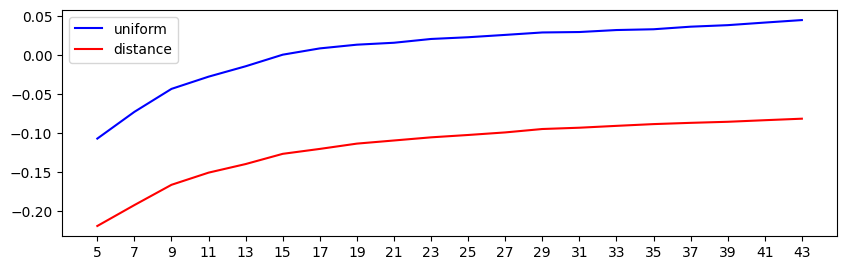

In [151]:
uniform  = []
distance = []
r = range (5,45,2)

for k in r:
    
    # Euclidan, 'straight' distance
    model = KNeighborsRegressor(n_neighbors = k, weights='uniform')
    model.fit(X_train.values, y_train.values)
    uniform.append(model.score(X_test.values,y_test.values))

    # Distance is inversely proportional (to lessen the weight of outliers)
    model = KNeighborsRegressor(n_neighbors = k, weights='distance') 
    model.fit(X_train.values, y_train.values)
    distance.append(model.score(X_test.values,y_test.values))

uniform = np.array(uniform)
distance = np.array(distance)

plt.rcParams['figure.figsize'] = [10, 3]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.plot(r,uniform,label='uniform',color='blue')
plt.plot(r,distance,label='distance',color='red')
plt.legend()
plt.gca().set_xticks(r)
plt.show()

In [176]:
mean_absolute_percentage_error(y_test, y_pred_test)

0.01963429229747025

In [50]:
#pd.DataFrame({"k" : r, "uniform" : uniform, "distance" : distance})